#import all essential libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage



#defining a function for results visualization

In [8]:

def plot_clustering_results(X, labels, centers=None, silhouette_avg=None, title="Clustering Result"):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k')
    if centers is not None:
        ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    plt.show()
    if silhouette_avg is not None:
        print(f"Silhouette Score: {silhouette_avg}")

#Datasets formation

In [6]:
# Generate datasets
datasets = {
    "moons": make_moons(n_samples=300, noise=0.05, random_state=42),
    "blobs": make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42),
    "circles": make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
}


In [7]:
# Standardize data
datasets = {key: (StandardScaler().fit_transform(data[0]), data[1]) for key, data in datasets.items()}

#defining the three types of clustering algorithms 


--- MOONS DATASET ---


c:\Users\User\Desktop\lab3\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


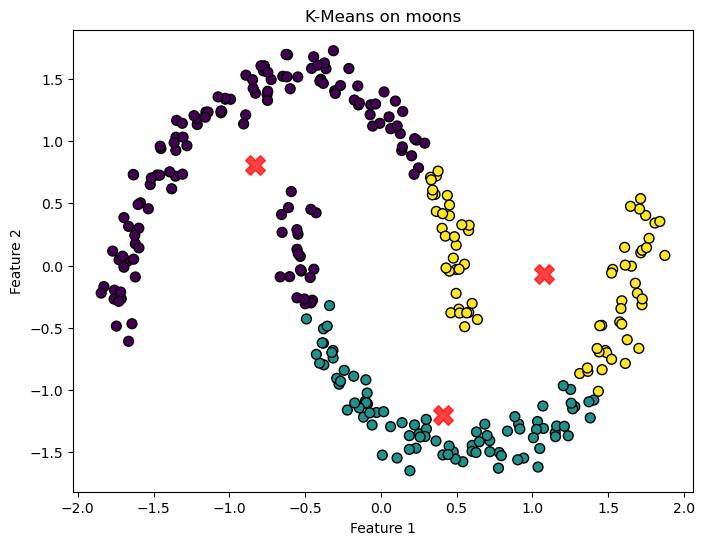

Silhouette Score: 0.4406217118885604


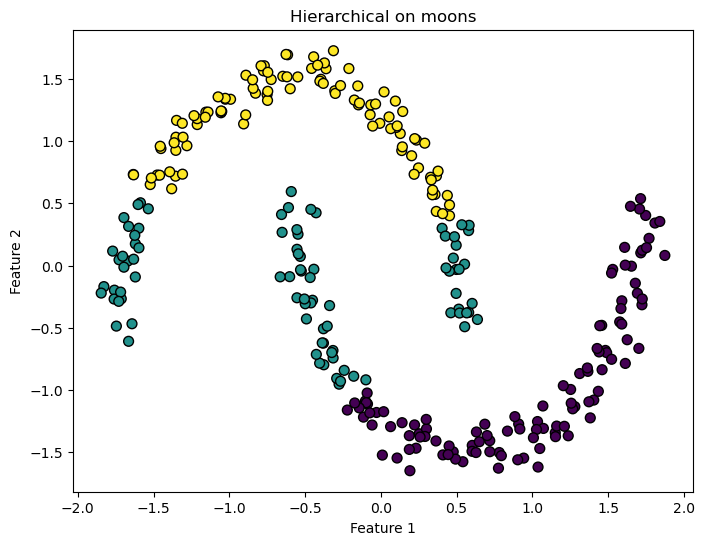

Silhouette Score: 0.3806311354199743


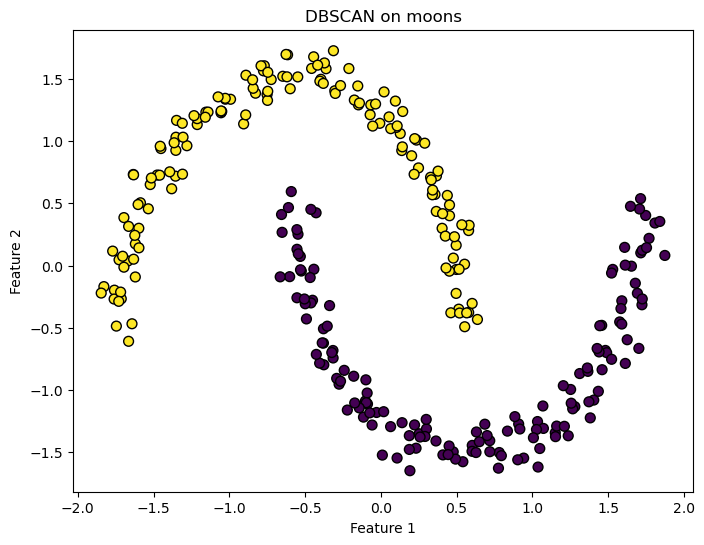

Silhouette Score: 0.38602599723729836

--- BLOBS DATASET ---


c:\Users\User\Desktop\lab3\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


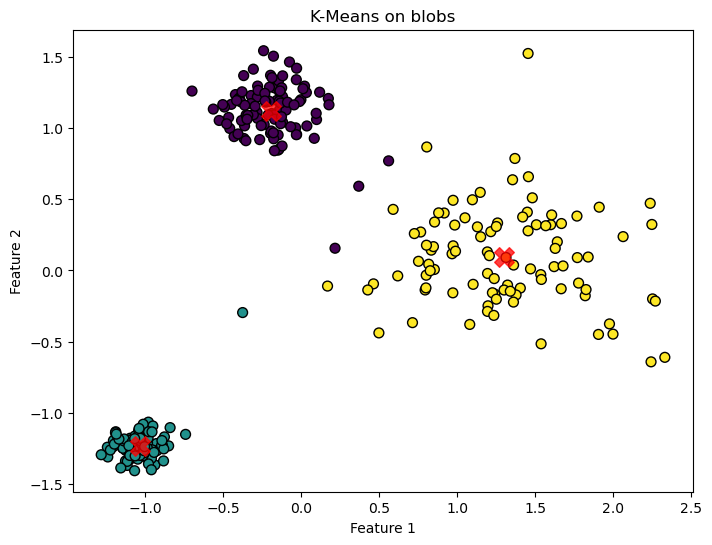

Silhouette Score: 0.7866438478263322


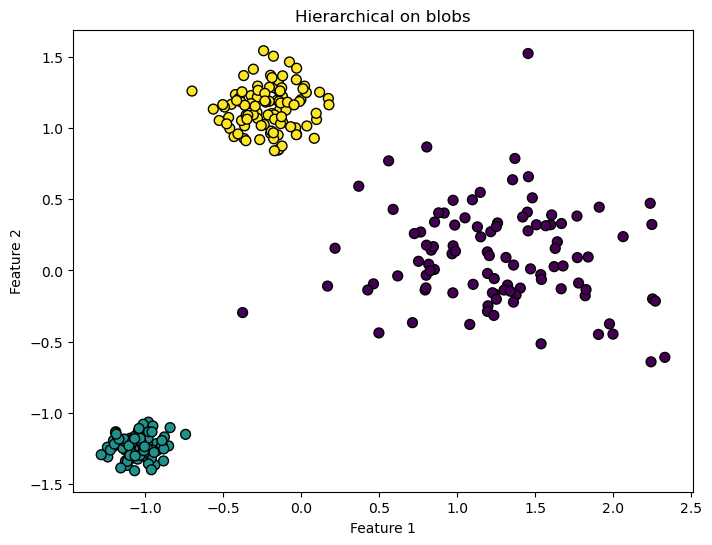

Silhouette Score: 0.7833306758277444


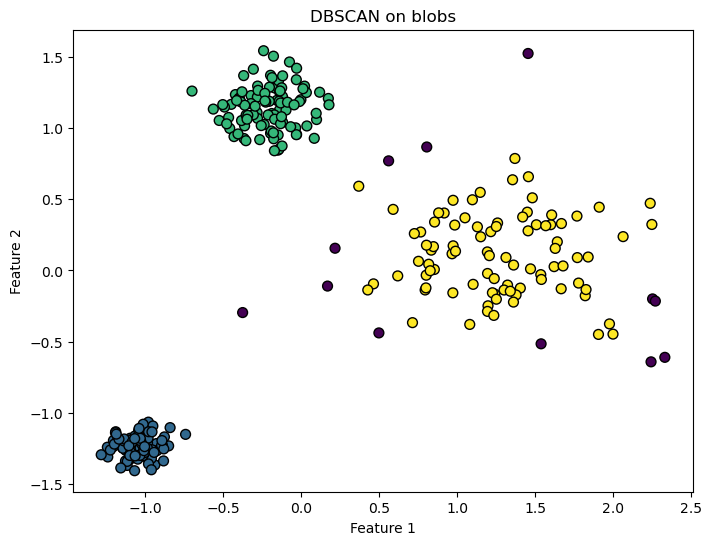

Silhouette Score: 0.7199383078760304

--- CIRCLES DATASET ---


c:\Users\User\Desktop\lab3\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


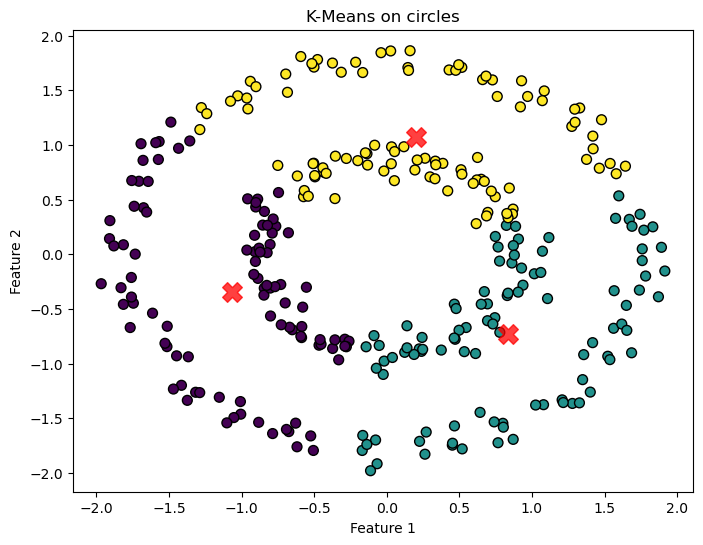

Silhouette Score: 0.3805731055893125


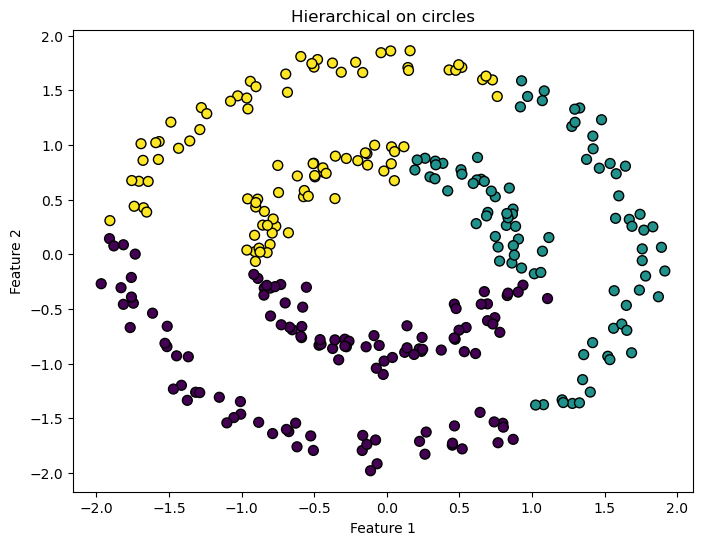

Silhouette Score: 0.3506814798444705


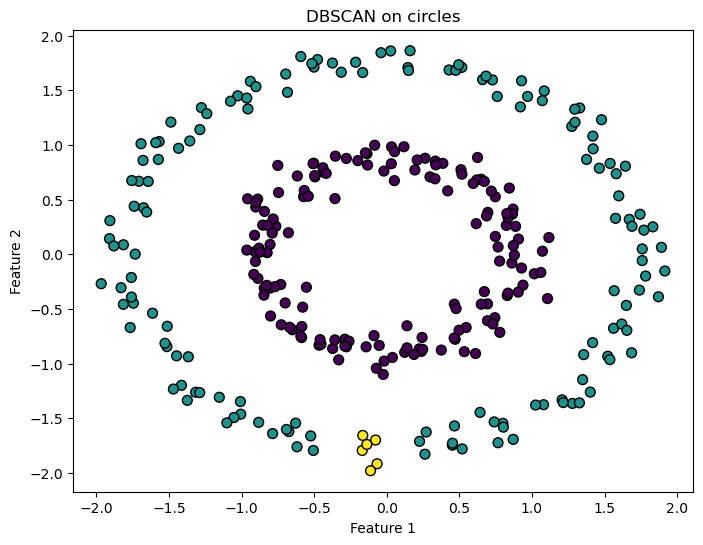

Silhouette Score: 0.004177179887973604


In [9]:
# Apply clustering algorithms
for dataset_name, (X, _) in datasets.items():
    print(f"\n--- {dataset_name.upper()} DATASET ---")
    
    # K-Means
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    silhouette_avg_kmeans = silhouette_score(X, kmeans_labels)
    plot_clustering_results(X, kmeans_labels, centers=kmeans.cluster_centers_, 
                            silhouette_avg=silhouette_avg_kmeans, title=f"K-Means on {dataset_name}")
    
    # Hierarchical Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=3)
    agg_labels = agg_clustering.fit_predict(X)
    silhouette_avg_agg = silhouette_score(X, agg_labels)
    plot_clustering_results(X, agg_labels, silhouette_avg=silhouette_avg_agg, title=f"Hierarchical on {dataset_name}")
    
    # DBSCAN
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    if len(set(dbscan_labels)) > 1:  # Only compute silhouette score if more than 1 cluster found
        silhouette_avg_dbscan = silhouette_score(X, dbscan_labels)
    else:
        silhouette_avg_dbscan = None
    plot_clustering_results(X, dbscan_labels, silhouette_avg=silhouette_avg_dbscan, title=f"DBSCAN on {dataset_name}")
